Osnabrück University - Machine Learning (Summer Term 2018) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 10

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, June 17, 2018**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 1: Classification [8 Points]

In the lecture (ML-09 Slides 7ff) several types of classifiers have been introduced. In this assignment you will explore differences and similarities between them.

### a) LDA

How does the LDA classifier work? What restrictions have to be fullfilled by the data for this method to work and why?

*In order to perform linear discriminant analysis there are a few assumptions that need to be fulfilled by the data. First of all LDA assumes that there are only two classes which are normally distributed and their covariance matrices are assumed to be identical. Both classes have identical a priori probability.*

*The classifier works in multiple steps: first it computes the mean vector for the different classes, then it computes the scatter matrices (in-between and within-class). Afterwards the eigenvectors and corresponding eigenvalues for the scatter matrices are calculated and sorted in order to chose the eigenvectors with the largest eigenvalues.This eigenvector matrix is then used to transform the samples onto the new subspace.*

*LDA makes predictions by estimating the probability that a new set of inputs belongs to each class (the class with the highest probability is the output class).*

### b) Nearest Neighbor

How does the nearest neighbor classifier work? When would you use it and how is it trained?

*The nearest neighbour classifier basically stores all values from the training data and then compares new input to the stored  samples to find the nearest corresponding data point. Depending on the training data size, this approach is using a lot of  memory but there is no training time needed as no generalization is happening. If memory consumption or computation time (in case there is a big data set) is not an issue, this approach can be used.*


### c) Support Vector Machines

Name some differences between a SVM and a MLP. When would you use which?

*SVM:*
- binary classifier
- classic: linear separable problems
- kernel trick: non-linear separatrix (map into higher dimensional space where it becomes linearly separable)
- robust to outliers

*MLP:*
- can classify multiple classes
- non-linear separable problems
- not very robust to outliers

*If there are more than two classes, the MLP seems to be the obvious choice. In case the data is very noisy the SVM will not be affected by the outliers as much as the MLP. Both can handle non-linear separable problems, however computation time for projecting the data into a higher dimensional space will be much higher and therefore a MLP makes more sense.*

### d) Random forests

Explain in your own words the concept of a *random forest*. What is meant by *bagging of trees* and *bagging of features* and what are the respective benefits? How do radom forests allow for *parallelization* in *training* and *classification*? 

*The concept of a random forest lies in the training of many decision trees on subsets of the training set while randomly varying certain aspects of the training for each tree. In the end each decision tree votes for classification and the class getting majority votes is selected as output.*

*Tree bagging means the decision trees are not trained on the whole set but on different subsets of the training set. Feature bagging refers to the approach that individual trees do not use all available features at each split. Instead some features are randomly selected for each new split and presented to the decision tree algorithm. Both of these methods provide a solution to overfitting which happens often when using simple decision trees. The main advantage if feature bagging lies in the reduced influence of features with extreme predictive power.*

*Parallelization in training is possible by training separate trees on different machines/processors at the same time. Similarly, the same process can be used in classification.* 

## Assignment 2: Reinforcement Learning [12 Points]

In this assignment you will have a look at the Q-Learning algorithm described in the lecture (ML-10 Slide 18). For this we generate a field with random rewards. A learning agent is then exploring the field and learns the optimal path to navigate through it. The code below is again filled with some ``TODO``s that should be filled by you in order to implement the Q-Learning algorithm. 

Below the code there are some questions! You also find a free-code field for a complete own implementation. You may use your own test mazes.

In [31]:
import numpy as np
import numpy.random as rand

def generate_field(x, y, num_rewards, max_reward):
    """
    Generate a random game field with rewards.
    
    Args:
        x (int):            x dimension of the field
        y (int):            y dimension of the field 
        num_rewards (int):  the number of rewards that should be randomly placed
        max_reward (int):   the maximum reward that can be placed 
        
    Returns:
        ndarray: A field with randomly initialized rewards, the rest of the 
        entries is zero
    """
    field = np.zeros((y,x), dtype=np.uint8)
    
    for i in range(num_rewards):
        field[rand.randint(y), rand.randint(x)] = rand.choice(max_reward)
    
    return field

In [32]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

class QLearning:
    """
    This class contains all the necessary methods to navigate through
    a maze or game with the help of a little bit of Q-Learning.
    """

    def __init__(self, field, actions, gamma):
        """
        Initializes the QLearning Algorithm with the necessary parameters.
        All q values are stored in self.q - this is an array that has
        ACTIONS x map_x x map_y dimensions to store a value for each action
        in each field. The starting position self.pos is randomly initialized.
        
        Args:
            field (ndarray):  the map
            actions (list):   the available actions
            gamma (float):    the gamma in the lecture slides
        
        Returns:
            QLearning: An instance that can be used for Q-Learning on the field
        """
        # q stores the q_values for each action in each space of the field.
        self.field = field
        self.actions = actions
        self.gamma = gamma
        
        # Remember the map extend for further navigation.
        self.map_y = self.field.shape[0]
        self.map_x = self.field.shape[1]
        
        # Create q value matrix.
        self.q = np.zeros((len(self.actions), self.map_y, self.map_x))

        # Start on a random position in the field.
        self.pos = [np.random.randint(self.map_y), np.random.randint(self.map_x)]


    def get_coordinates(self, position, action):
        """
        Returns the coordinates that follow a certain action, depending
        on the current position of the learner. If the border is reached
        the agent just stops there.
        
        Args:
            position (pair):  the current position
            action (string):  the action that should be performed (one of: 'up', 'down', ...)
            
        Returns:
            pair of int: the updated coordinates
        """
        # return the right new coordinates depending on the position
        # YOUR CODE HERE
        #use the current positions as start values for easier calculations
        #self.pos in form (y, x)!!!
        new_pos_x = position[1]
        new_pos_y = position[0]
        
        if action in self.actions:
            #check the given action and calculate new position
            if action == 'up' and new_pos_y > 0:
                new_pos_y -= 1
            elif action == 'down'and new_pos_y < self.map_y-1:
                new_pos_y += 1
            elif action == 'left' and new_pos_x > 0:
                new_pos_x -= 1
            elif action == 'right' and new_pos_x < self.map_x-1: 
                new_pos_x += 1
        else:
            raise ValueError('Illegal action:', action)

        return (new_pos_y, new_pos_x)


    def update(self):
        """
        Implementation of the update step. Closely follows the Algorithm described on
        ML-10 Sl.18. Note that you have attributes available as specified in the
        __init__ method of this class, in addition to that is the FIELD variable that
        stores the real field the agent is iterating about, as well as ACTIONS which
        stores the available actions.
        """
        # Select a random action that should be performed next.
        # Be careful to handle the case where you hit the wall!
        # YOUR CODE HERE
        next_action = np.random.choice(ACTIONS)
        next_position = self.get_coordinates(self.pos, next_action)
        #check if the chosen action would keep us at the same position (hitting the wall)
        #return as everything stays the same
        if next_position == self.pos:
            #print('hitting a wall')
            return

        # Receive the reward for the new position from the field.
        # YOUR CODE HERE
        reward = self.field[next_position[0], next_position[1]]
        
        
        # Update the q-value for the performed action.
        # YOUR CODE HERE
        #get the index of the current action to update in q
        action_index = self.actions.index(next_action)
        #q update: q(s,a) ← r + γ maxa’ q(s’,a’).
        updated_q= reward+ self.gamma*(max(self.q[:, next_position[0], next_position[1]]))
        #update the action for the current/old position: doing action a in current state!
        self.q[action_index, self.pos[0], self.pos[1]] = updated_q

        # Update the position of the player to the new field.
        # YOUR CODE HERE
        self.pos = next_position


    def plot(self):
        """
        Plots the current state.
        """
        fig_player = plt.figure('QLearning State')

        for i, direc in enumerate(ACTIONS):
            plt.subplot(3,3,2*i+2)
            plt.axis('off')
            plt.title(direc)
            plt.imshow(self.q[i,:,:], interpolation = 'None')

        fig_player.canvas.draw()

<IPython.core.display.Javascript object>


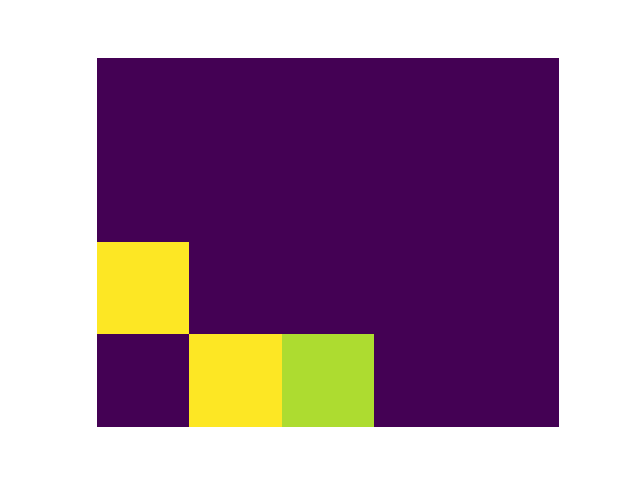

<IPython.core.display.Javascript object>


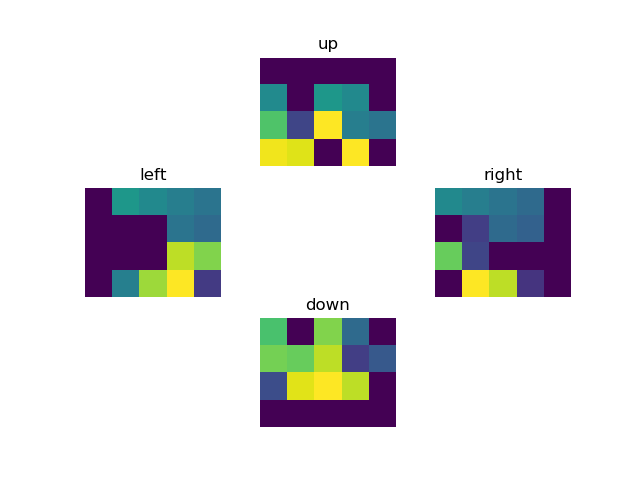

C:\Users\britt\Anaconda3\envs\ml\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [33]:
%matplotlib notebook

import matplotlib.pyplot as plt

# Determine the size of the field, change this parameters as you like
m_x = 5
m_y = 4

steps = 200

ACTIONS = ['up','left','right','down']  # Those are the availabe actions for the QLearning.
FIELD = generate_field(m_x, m_y, 5, 10) # The field that is used for learning.

# Plotting the generated field
figure = plt.figure('Field')
plt.axis('off')
plt.imshow(FIELD, interpolation='none')
figure.canvas.draw()

# Generate a QLearning instance with the right parameters.
# YOUR CODE HERE
player = QLearning(actions=ACTIONS, field=FIELD, gamma=0.9)

# Now we perform steps many learning iterations on the field with
# the generated QLearning instance.
for i in range(steps):     
    player.update()
    player.plot()

Explain in your own words, how the algorithm works. What is depicted on the resulting plots. How can an action policy be derived from these data?

YOUR ANSWER HERE

You are also free to write your complete own implementation of the QLearning algorithm (instead of completing the code above). Use the following cell for your implementation.

In [ ]:
# YOUR CODE HERE